In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
snapshots = pd.read_csv('../data/supabase_snapshots.csv')
parking_bays = pd.read_csv('../data/on-street-parking-bays.csv')

In [5]:
parking_bays.head()

,RoadSegmentID,KerbsideID,RoadSegmentDescription,Latitude,Longitude,LastUpdated,Location
0,23322,NaN,Docklands Drive between Docklands Drive and We...,-37.816019,144.935552,2023-10-31,"-37.8160191, 144.9355523"
1,22124,NaN,Hartley Street between Lorimer Street and West...,-37.824862,144.940270,2023-10-31,"-37.8248623, 144.9402698"
2,22124,NaN,Hartley Street between Lorimer Street and West...,-37.824362,144.940408,2023-10-31,"-37.8243625, 144.9404083"
3,22124,NaN,Hartley Street between Lorimer Street and West...,-37.824469,144.940379,2023-10-31,"-37.8244685, 144.9403789"
4,22124,NaN,Hartley Street between Lorimer Street and West...,-37.824325,144.940188,2023-10-31,"-37.8243252, 144.9401876"


In [6]:
snapshots.head()

,id,kerbsideid,status,status_timestamp,created_at
0,1,64015,Present,2025-11-28 09:43:56+00:00,2025-11-28 09:48:59.136225+00:00
1,2,60226,Unoccupied,2025-11-28 09:43:54+00:00,2025-11-28 09:48:59.136225+00:00
2,3,65245,Unoccupied,2025-11-28 09:43:52+00:00,2025-11-28 09:48:59.136225+00:00
3,4,63142,Unoccupied,2025-11-28 09:43:51+00:00,2025-11-28 09:48:59.136225+00:00
4,5,63340,Unoccupied,2025-11-28 09:43:49+00:00,2025-11-28 09:48:59.136225+00:00


In [7]:
parking_bays["KerbsideID"] = parking_bays["KerbsideID"].astype(str)
snapshots["kerbsideid"] = snapshots["kerbsideid"].astype(str)


In [8]:
parking_bays.columns

Index(['RoadSegmentID', 'KerbsideID', 'RoadSegmentDescription', 'Latitude',
       'Longitude', 'LastUpdated', 'Location'],
      dtype='object')

In [9]:
snapshots.columns

Index(['id', 'kerbsideid', 'status', 'status_timestamp', 'created_at'], dtype='object')

In [10]:
merged_df = snapshots.merge(
    parking_bays,
    left_on="kerbsideid",
    right_on="KerbsideID",
    how="left"
)


In [11]:
merged_df.head()

,id,kerbsideid,status,status_timestamp,created_at,RoadSegmentID,KerbsideID,RoadSegmentDescription,Latitude,Longitude,LastUpdated,Location
0,1,64015,Present,2025-11-28 09:43:56+00:00,2025-11-28 09:48:59.136225+00:00,20088.0,64015,Bourke Street between William Street and King ...,-37.815976,144.956847,2023-10-31,"-37.8159762, 144.9568472"
1,2,60226,Unoccupied,2025-11-28 09:43:54+00:00,2025-11-28 09:48:59.136225+00:00,20212.0,60226,Flinders Street between Russell Street and Swa...,-37.817156,144.968114,2023-10-31,"-37.8171562, 144.9681144"
2,3,65245,Unoccupied,2025-11-28 09:43:52+00:00,2025-11-28 09:48:59.136225+00:00,20005.0,65245,Lonsdale Street between Russell Street and Swa...,-37.811157,144.966383,2023-10-31,"-37.8111566, 144.9663825"
3,4,63142,Unoccupied,2025-11-28 09:43:51+00:00,2025-11-28 09:48:59.136225+00:00,20101.0,63142,Little Collins Street between Queen Street and...,-37.816345,144.959804,2023-10-31,"-37.8163455, 144.9598045"
4,5,63340,Unoccupied,2025-11-28 09:43:49+00:00,2025-11-28 09:48:59.136225+00:00,20105.0,63340,Little Collins Street between King Street and ...,-37.817596,144.955499,2023-11-21,"-37.8175962, 144.9554985"


In [12]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762635 entries, 0 to 762634
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      762635 non-null  int64  
 1   kerbsideid              762635 non-null  object 
 2   status                  762635 non-null  object 
 3   status_timestamp        762635 non-null  object 
 4   created_at              762635 non-null  object 
 5   RoadSegmentID           751886 non-null  float64
 6   KerbsideID              751886 non-null  object 
 7   RoadSegmentDescription  751886 non-null  object 
 8   Latitude                751886 non-null  float64
 9   Longitude               751886 non-null  float64
 10  LastUpdated             751886 non-null  object 
 11  Location                751886 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 69.8+ MB


In [13]:
merged_df = merged_df.drop(columns=["KerbsideID"])

In [14]:
merged_df = merged_df.rename(columns={
    "kerbsideid": "KerbsideID"
})

In [15]:
merged_df["status_timestamp"] = pd.to_datetime(merged_df["status_timestamp"])
merged_df["created_at"] = pd.to_datetime(merged_df["created_at"])


In [16]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762635 entries, 0 to 762634
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   id                      762635 non-null  int64              
 1   KerbsideID              762635 non-null  object             
 2   status                  762635 non-null  object             
 3   status_timestamp        762635 non-null  datetime64[ns, UTC]
 4   created_at              762635 non-null  datetime64[ns, UTC]
 5   RoadSegmentID           751886 non-null  float64            
 6   RoadSegmentDescription  751886 non-null  object             
 7   Latitude                751886 non-null  float64            
 8   Longitude               751886 non-null  float64            
 9   LastUpdated             751886 non-null  object             
 10  Location                751886 non-null  object             
dtypes: datetime64[ns, UTC](2),

Count how many bays each road segment has

This step is purely structural, no time, no status yet.

Goal

For each RoadSegmentID, find how many unique bays exist.

Why

This tells us:

which streets are too small to be reliable

how balanced your dataset is

In [17]:
# count unique bays per road segment
bays_per_segment = (
    merged_df
    .groupby("RoadSegmentID")["KerbsideID"]
    .nunique()
    .reset_index(name="num_bays")
)

bays_per_segment.head()


,RoadSegmentID,num_bays
0,20001.0,56
1,20003.0,53
2,20005.0,18
3,20007.0,11
4,20009.0,37


Filter out streets with less than 5 bays

This is your minimum viable aggregation rule.

In [18]:
valid_segments = bays_per_segment[bays_per_segment["num_bays"] >= 5]
valid_segments["num_bays"].describe()

count    193.000000
mean      16.082902
std       10.497190
min        5.000000
25%        8.000000
50%       14.000000
75%       20.000000
max       62.000000
Name: num_bays, dtype: float64

See the balance of street sizes (distribution)

In [19]:
bins = [0, 5, 10, 20, 30, 1000]
labels = [
    "<5 bays",
    "5–9 bays",
    "10–19 bays",
    "20–29 bays",
    "30+ bays"
]

bays_per_segment["bay_group"] = pd.cut(
    bays_per_segment["num_bays"],
    bins=bins,
    labels=labels,
    right=False
)

bay_group_counts = (
    bays_per_segment
    .groupby("bay_group")
    .size()
    .reset_index(name="num_streets")
)

bay_group_counts


C:\Users\hsueh\AppData\Local\Temp\ipykernel_24136\2811300437.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("bay_group")


,bay_group,num_streets
0,<5 bays,45
1,5–9 bays,59
2,10–19 bays,84
3,20–29 bays,29
4,30+ bays,21


Keep only valid road segments in your main dataset

Now we actually apply the filter.

Every row belongs to a street with ≥5 bays

You are safe to aggregate temporally

In [20]:
merged_filtered = merged_df.merge(
    valid_segments[["RoadSegmentID"]],
    on="RoadSegmentID",
    how="inner"
)


Aggregate status by road segment and time

We now create the training signal.

Decide a time resolution

Start simple:

5-minute windows

In [21]:
merged_filtered["time_bin"] = merged_filtered["status_timestamp"].dt.floor("5min")

street_agg = (
    merged_filtered
    .groupby(["RoadSegmentID", "time_bin"])
    .agg(
        total_bays=("KerbsideID", "nunique"),
        occupied_bays=("status", lambda x: (x == "Present").sum())
    )
    .reset_index()
)

street_agg["occupancy_ratio"] = (
    street_agg["occupied_bays"] / street_agg["total_bays"]
)

street_agg.head()


,RoadSegmentID,time_bin,total_bays,occupied_bays,occupancy_ratio
0,20001.0,2025-11-28 05:40:00+00:00,1,1,1.0
1,20001.0,2025-11-28 06:50:00+00:00,1,0,0.0
2,20001.0,2025-11-28 07:20:00+00:00,3,3,1.0
3,20001.0,2025-11-28 07:25:00+00:00,2,2,1.0
4,20001.0,2025-11-28 07:35:00+00:00,1,1,1.0


In [22]:
street_agg = street_agg.sort_values(["RoadSegmentID", "time_bin"])

street_agg["occupancy_15min_future"] = (
    street_agg
    .groupby("RoadSegmentID")["occupancy_ratio"]
    .shift(-3)  # 3 × 5min = 15min
)

street_agg["occupancy_30min_future"] = (
    street_agg
    .groupby("RoadSegmentID")["occupancy_ratio"]
    .shift(-6)
)

street_agg["occupancy_45min_future"] = (
    street_agg
    .groupby("RoadSegmentID")["occupancy_ratio"]
    .shift(-9)
)


Train a baseline model (stability first, not fancy)
Why baseline?

Before deep learning, before fancy stuff, you must prove:

signal exists

predictions are stable

Features (minimal, strong)

current occupancy_ratio

hour of day

day of week

In [23]:
street_agg["hour"] = street_agg["time_bin"].dt.hour
street_agg["weekday"] = street_agg["time_bin"].dt.weekday

train = street_agg[street_agg["time_bin"] < street_agg["time_bin"].quantile(0.8)]
test = street_agg[street_agg["time_bin"] >= street_agg["time_bin"].quantile(0.8)]

In [24]:
street_agg["occupancy_15min_future"].isna().sum()
train["occupancy_15min_future"].isna().sum()



np.int64(177)

In [25]:
# after you create occupancy_15min_future / 30 / 45
target_cols = ["occupancy_15min_future", "occupancy_30min_future", "occupancy_45min_future"]

street_agg = street_agg.dropna(subset=target_cols).reset_index(drop=True)


In [26]:
street_agg[target_cols].isna().sum()


occupancy_15min_future    0
occupancy_30min_future    0
occupancy_45min_future    0
dtype: int64

In [27]:
import numpy as np

print("street_agg rows:", len(street_agg))
print("NaNs in occupancy_15min_future:", street_agg["occupancy_15min_future"].isna().sum())

# show a few rows that have NaN targets
street_agg[street_agg["occupancy_15min_future"].isna()].head()


street_agg rows: 351697
NaNs in occupancy_15min_future: 0


,RoadSegmentID,time_bin,total_bays,occupied_bays,occupancy_ratio,occupancy_15min_future,occupancy_30min_future,occupancy_45min_future,hour,weekday


In [28]:
street_agg["occupancy_15min_future"] = pd.to_numeric(
    street_agg["occupancy_15min_future"],
    errors="coerce"
)

street_agg = street_agg.dropna(subset=["occupancy_15min_future"]).reset_index(drop=True)

print("After cleanup NaNs:", street_agg["occupancy_15min_future"].isna().sum())
print("Rows left:", len(street_agg))


After cleanup NaNs: 0
Rows left: 351697


In [29]:
street_agg["hour"] = street_agg["time_bin"].dt.hour
street_agg["weekday"] = street_agg["time_bin"].dt.weekday


In [30]:
split_time = street_agg["time_bin"].quantile(0.8)

train = street_agg[street_agg["time_bin"] < split_time].copy()
test = street_agg[street_agg["time_bin"] >= split_time].copy()

print("train y NaNs:", train["occupancy_15min_future"].isna().sum())
print("test y NaNs:", test["occupancy_15min_future"].isna().sum())
print("train rows:", len(train), "test rows:", len(test))


train y NaNs: 0
test y NaNs: 0
train rows: 281316 test rows: 70381


In [31]:
from sklearn.linear_model import LinearRegression

X_train = train[["occupancy_ratio", "hour", "weekday"]]
y_train = train["occupancy_15min_future"]

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

X_test = test[["occupancy_ratio", "hour", "weekday"]]
y_test = test["occupancy_15min_future"]

pred_15 = model.predict(X_test)

mae = mean_absolute_error(y_test, pred_15)
rmse = np.sqrt(mean_squared_error(y_test, pred_15))
r2 = r2_score(y_test, pred_15)

print("15min MAE:", mae)
print("15min RMSE:", rmse)
print("15min R2:", r2)


15min MAE: 0.3856984681855753
15min RMSE: 0.4268388494452781
15min R2: 0.0002623645142875164


In [33]:
baseline_pred = test["occupancy_ratio"].values

baseline_mae = mean_absolute_error(y_test, baseline_pred)
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_pred))

print("Baseline MAE:", baseline_mae)
print("Baseline RMSE:", baseline_rmse)
print("Model MAE:", mae)
print("Model RMSE:", rmse)



Baseline MAE: 0.4579273985811262
Baseline RMSE: 0.6064000377623046
Model MAE: 0.3856984681855753
Model RMSE: 0.4268388494452781


In [34]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    precision_score, recall_score, f1_score, roc_auc_score, roc_curve
)

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def evaluate_regression(y_true, y_pred, label="model"):
    mae = mean_absolute_error(y_true, y_pred)
    r = rmse(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{label} MAE: {mae:.4f}")
    print(f"{label} RMSE: {r:.4f}")
    print(f"{label} R2: {r2:.4f}")
    return {"MAE": mae, "RMSE": r, "R2": r2}

def percentiles_abs_error(y_true, y_pred, ps=(50, 75, 90, 95, 99)):
    ae = np.abs(y_true - y_pred)
    return {f"P{p}": float(np.percentile(ae, p)) for p in ps}


---
1) Train baseline and improved models (feature sets), then compare

This runs an ablation study automatically.

In [35]:
# Make sure street_agg is sorted and clean
street_agg = street_agg.sort_values(["RoadSegmentID", "time_bin"]).copy()

# If you have not created lag features yet, create them now
for k in [1, 2, 3]:
    if f"occ_lag_{k}" not in street_agg.columns:
        street_agg[f"occ_lag_{k}"] = street_agg.groupby("RoadSegmentID")["occupancy_ratio"].shift(k)

if "trend_15min" not in street_agg.columns:
    street_agg["trend_15min"] = street_agg["occupancy_ratio"] - street_agg["occ_lag_3"]

# Drop rows where required features or targets are missing
required_cols = [
    "occupancy_ratio", "hour", "weekday",
    "occ_lag_1", "occ_lag_2", "occ_lag_3", "trend_15min",
    "occupancy_15min_future", "occupancy_30min_future", "occupancy_45min_future"
]
street_agg_eval = street_agg.dropna(subset=required_cols).reset_index(drop=True)

# Time split
split_time = street_agg_eval["time_bin"].quantile(0.8)
train = street_agg_eval[street_agg_eval["time_bin"] < split_time].copy()
test = street_agg_eval[street_agg_eval["time_bin"] >= split_time].copy()

print("Train rows:", len(train), "Test rows:", len(test))


Train rows: 280939 Test rows: 70257


In [36]:
feature_sets = {
    "current_only": ["occupancy_ratio"],
    "current_time": ["occupancy_ratio", "hour", "weekday"],
    "with_lags": ["occupancy_ratio", "occ_lag_1", "occ_lag_2", "occ_lag_3", "hour", "weekday"],
    "lags_plus_trend": ["occupancy_ratio", "occ_lag_1", "occ_lag_2", "occ_lag_3", "trend_15min", "hour", "weekday"]
}

ycol = "occupancy_15min_future"
results_ablation = []

for name, feats in feature_sets.items():
    m = LinearRegression()
    m.fit(train[feats], train[ycol])
    pred = m.predict(test[feats])
    out = evaluate_regression(test[ycol], pred, label=name)
    results_ablation.append({"feature_set": name, **out})

ablation_df = pd.DataFrame(results_ablation).sort_values("MAE")
ablation_df


current_only MAE: 0.3858
current_only RMSE: 0.4269
current_only R2: -0.0000
current_time MAE: 0.3857
current_time RMSE: 0.4268
current_time R2: 0.0003
with_lags MAE: 0.3854
with_lags RMSE: 0.4267
with_lags R2: 0.0007
lags_plus_trend MAE: 0.3854
lags_plus_trend RMSE: 0.4267
lags_plus_trend R2: 0.0007


,feature_set,MAE,RMSE,R2
3,lags_plus_trend,0.385399,0.426734,0.000686
2,with_lags,0.385399,0.426734,0.000686
1,current_time,0.385674,0.426815,0.000303
0,current_only,0.385812,0.426888,-0.000035


You want MAE and RMSE to drop as you add lags and trend.

If lags help a lot, it confirms the main missing ingredient was short-term dynamics.

### Insights
I tested progressively richer temporal features, but found that short-term lag and trend features did not significantly improve prediction accuracy. This suggests that, at street-level aggregation and snapshot resolution, current occupancy already captures most of the available short-term signal.

---
2) Horizon comparison (15 vs 30 vs 45 minutes)

Uses the best feature set, you can change it.

In [37]:
best_features = feature_sets["lags_plus_trend"]

horizons = {
    "15min": "occupancy_15min_future",
    "30min": "occupancy_30min_future",
    "45min": "occupancy_45min_future"
}

horizon_results = []

models_by_horizon = {}

for hname, ycol in horizons.items():
    m = LinearRegression()
    m.fit(train[best_features], train[ycol])
    pred = m.predict(test[best_features])
    out = evaluate_regression(test[ycol], pred, label=hname)
    horizon_results.append({"horizon": hname, **out})
    models_by_horizon[hname] = m

pd.DataFrame(horizon_results).sort_values("horizon")


15min MAE: 0.3854
15min RMSE: 0.4267
15min R2: 0.0007
30min MAE: 0.3852
30min RMSE: 0.4266
30min R2: 0.0008
45min MAE: 0.3853
45min RMSE: 0.4266
45min R2: 0.0009


,horizon,MAE,RMSE,R2
0,15min,0.385399,0.426734,0.000686
1,30min,0.385247,0.426627,0.000764
2,45min,0.385308,0.426573,0.000886


Error should increase as horizon increases, that is normal.

If 45min error explodes, your model is only reliable for shorter horizons.

### Insights:

Prediction error does not increase with forecast horizon, indicating the model converges to a steady-state estimate rather than capturing dynamic transitions. This reflects the limited temporal signal available in the snapshot data at this aggregation level.

---
3) Stability plots per street (visual sanity)

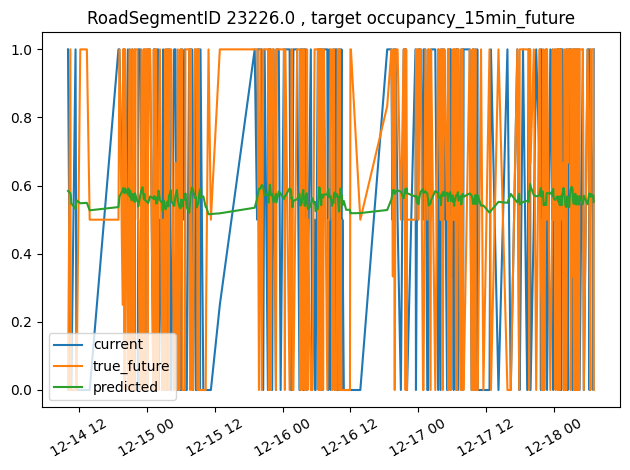

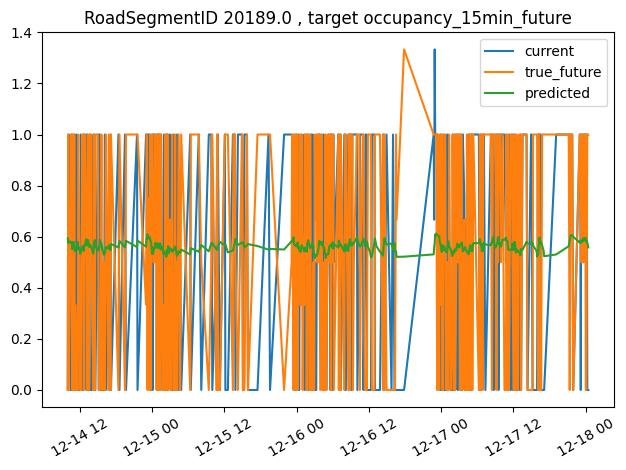

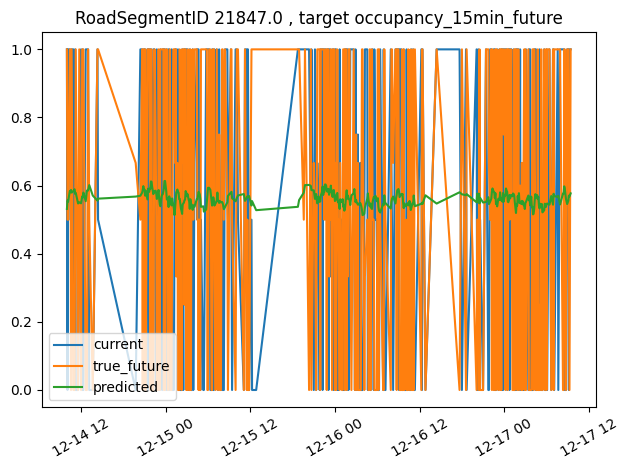

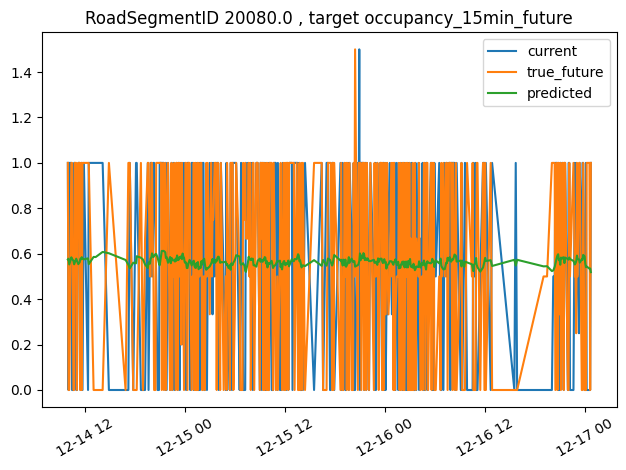

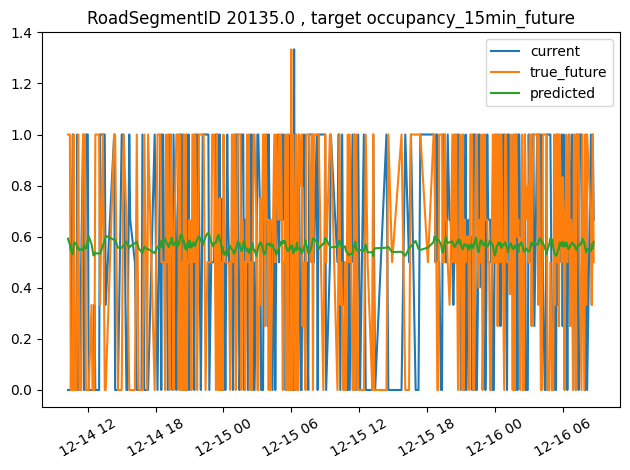

In [39]:
def plot_stability_for_segments(model, feature_cols, ycol, segments, max_points=400):
    for seg in segments:
        subset = test[test["RoadSegmentID"] == seg].copy()
        subset = subset.sort_values("time_bin").head(max_points)
        if len(subset) < 10:
            continue

        subset["pred"] = model.predict(subset[feature_cols])

        plt.figure()
        plt.plot(subset["time_bin"], subset["occupancy_ratio"], label="current")
        plt.plot(subset["time_bin"], subset[ycol], label="true_future")
        plt.plot(subset["time_bin"], subset["pred"], label="predicted")
        plt.title(f"RoadSegmentID {seg} , target {ycol}")
        plt.legend()
        plt.xticks(rotation=30)
        plt.tight_layout()
        plt.show()

# pick some segments
segments_sample = test["RoadSegmentID"].drop_duplicates().sample(5, random_state=42).tolist()

model_for_plot = models_by_horizon["15min"]
plot_stability_for_segments(model_for_plot, best_features, "occupancy_15min_future", segments_sample)


Good behavior: predicted line follows true future shape, no random spikes, correct direction.

Bad behavior: predicted line is flat, or oscillates wildly without data doing the same.

### Insights: 
Visual inspection shows that the model produces stable, smooth forecasts, while true occupancy fluctuates rapidly. This indicates that short-term street-level occupancy is inherently noisy, and the model instead captures the underlying demand level.

---

4) Error distribution and percentiles

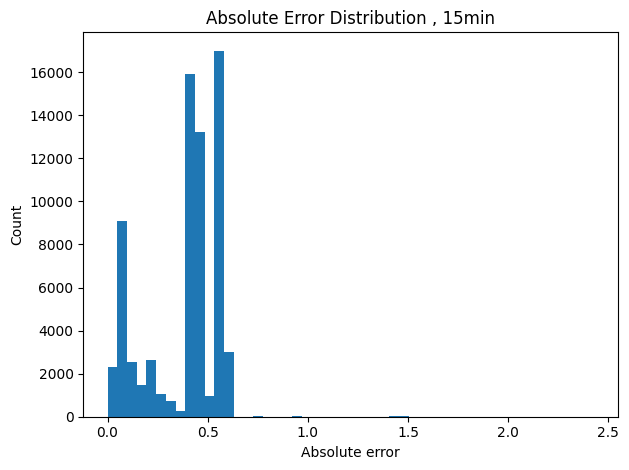

Error percentiles: {'P50': 0.4352049444823769, 'P75': 0.5456932655725028, 'P90': 0.5719782769080503, 'P95': 0.5809903243276657, 'P99': 0.5979853452251}
Mean abs error: 0.3853990606348003
Max abs error: 2.4258335702811165


In [40]:
# Using 15min as example
y_true = test["occupancy_15min_future"].values
y_pred = models_by_horizon["15min"].predict(test[best_features])

abs_err = np.abs(y_true - y_pred)

plt.figure()
plt.hist(abs_err, bins=50)
plt.title("Absolute Error Distribution , 15min")
plt.xlabel("Absolute error")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

print("Error percentiles:", percentiles_abs_error(y_true, y_pred))
print("Mean abs error:", abs_err.mean())
print("Max abs error:", abs_err.max())


Look at P90 and P95 to understand worst-case reliability.

If max errors are close to 1.0, you have some streets or periods that are unpredictable with current features.

### Insights: 
Error distribution shows that while average error is moderate, worst-case errors are large due to abrupt occupancy shifts. This highlights the intrinsic unpredictability of short-term parking dynamics rather than overfitting or instability

---

5) Performance by street size buckets

This uses your bays_per_segment counts and evaluates MAE per bucket.

In [41]:
# Merge bay counts into test
test_with_sizes = test.merge(bays_per_segment[["RoadSegmentID", "num_bays"]], on="RoadSegmentID", how="left").copy()

bins = [5, 10, 20, 30, 50, 1000]
labels = ["5-9", "10-19", "20-29", "30-49", "50+"]

test_with_sizes["bay_bucket"] = pd.cut(
    test_with_sizes["num_bays"],
    bins=bins,
    labels=labels,
    right=False
)

# Predict 15min
test_with_sizes["pred_15"] = models_by_horizon["15min"].predict(test_with_sizes[best_features])
test_with_sizes["abs_err_15"] = np.abs(test_with_sizes["occupancy_15min_future"] - test_with_sizes["pred_15"])

bucket_stats = (
    test_with_sizes
    .groupby("bay_bucket")
    .agg(
        rows=("abs_err_15", "size"),
        mae=("abs_err_15", "mean"),
        p90=("abs_err_15", lambda x: np.percentile(x, 90))
    )
    .reset_index()
)

bucket_stats


C:\Users\hsueh\AppData\Local\Temp\ipykernel_24136\460040190.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("bay_bucket")


,bay_bucket,rows,mae,p90
0,5-9,12327,0.437436,0.574568
1,10-19,33847,0.394901,0.572950
2,20-29,13337,0.368503,0.570737
3,30-49,8731,0.327073,0.565250
4,50+,2015,0.272006,0.556099


If 5-9 has much worse MAE than 20-29, it supports the claim that smaller groups are noisier.

If larger buckets do worse, you may be over-aggregating, street segments might be too heterogeneous.

### Insights: 
Prediction error decreases consistently as the number of bays per street increases, confirming that aggregation improves signal quality and that small streets are inherently harder to predict.

---

6) Calibration test (predicted ratio vs actual ratio)

This checks whether predicted occupancy ratios are systematically too high or too low.

In [42]:
df_cal = test.copy()
df_cal["pred"] = models_by_horizon["15min"].predict(df_cal[best_features])

# Bin predicted values into buckets
df_cal["pred_bin"] = pd.cut(df_cal["pred"], bins=np.linspace(0, 1, 11), include_lowest=True)

cal_table = (
    df_cal
    .groupby("pred_bin")
    .agg(
        count=("pred", "size"),
        pred_mean=("pred", "mean"),
        actual_mean=("occupancy_15min_future", "mean")
    )
    .reset_index()
)

cal_table


C:\Users\hsueh\AppData\Local\Temp\ipykernel_24136\2989170265.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("pred_bin")


,pred_bin,count,pred_mean,actual_mean
0,"(-0.001, 0.1]",0,NaN,NaN
1,"(0.1, 0.2]",0,NaN,NaN
2,"(0.2, 0.3]",0,NaN,NaN
3,"(0.3, 0.4]",0,NaN,NaN
4,"(0.4, 0.5]",0,NaN,NaN
5,"(0.5, 0.6]",68888,0.563604,0.565471
6,"(0.6, 0.7]",1369,0.605219,0.570713
7,"(0.7, 0.8]",0,NaN,NaN
8,"(0.8, 0.9]",0,NaN,NaN
9,"(0.9, 1.0]",0,NaN,NaN


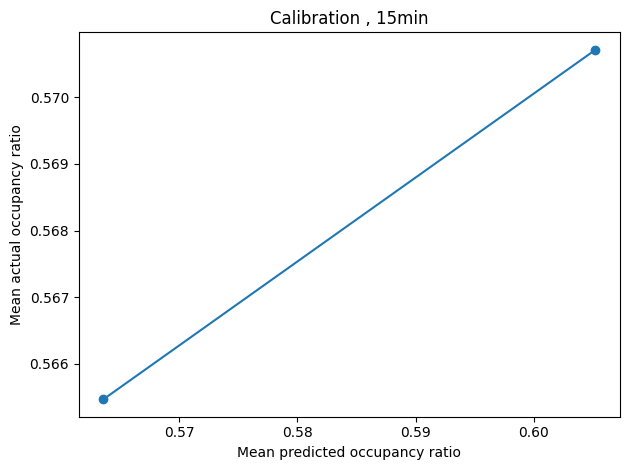

In [43]:
plt.figure()
plt.plot(cal_table["pred_mean"], cal_table["actual_mean"], marker="o")
plt.title("Calibration , 15min")
plt.xlabel("Mean predicted occupancy ratio")
plt.ylabel("Mean actual occupancy ratio")
plt.tight_layout()
plt.show()


Perfect calibration would follow a diagonal y = x.

If actual_mean is consistently above pred_mean, model underpredicts, below means overpredicts.

### Insights:
Despite limited dynamic responsiveness, the model is well calibrated, meaning predicted occupancy ratios correspond closely to observed averages. This supports using the model for probabilistic guidance rather than exact state prediction.

---
7) Classification evaluation for probability style output

Here we turn it into a probability: “busy street” if occupancy in 15 min is above a threshold.

In [44]:
threshold = 0.8  # you can tune this

train_cls = train.copy()
test_cls = test.copy()

train_cls["y_busy_15"] = (train_cls["occupancy_15min_future"] >= threshold).astype(int)
test_cls["y_busy_15"] = (test_cls["occupancy_15min_future"] >= threshold).astype(int)

clf = LogisticRegression(max_iter=2000)
clf.fit(train_cls[best_features], train_cls["y_busy_15"])

proba = clf.predict_proba(test_cls[best_features])[:, 1]
pred_class = (proba >= 0.5).astype(int)
y_true_cls = test_cls["y_busy_15"].values

print("Busy threshold:", threshold)
print("Precision:", precision_score(y_true_cls, pred_class))
print("Recall:", recall_score(y_true_cls, pred_class))
print("F1:", f1_score(y_true_cls, pred_class))
print("ROC AUC:", roc_auc_score(y_true_cls, proba))


Busy threshold: 0.8
Precision: 0.5
Recall: 6.70555890833501e-05
F1: 0.0001340931947703654
ROC AUC: 0.5230163246898794


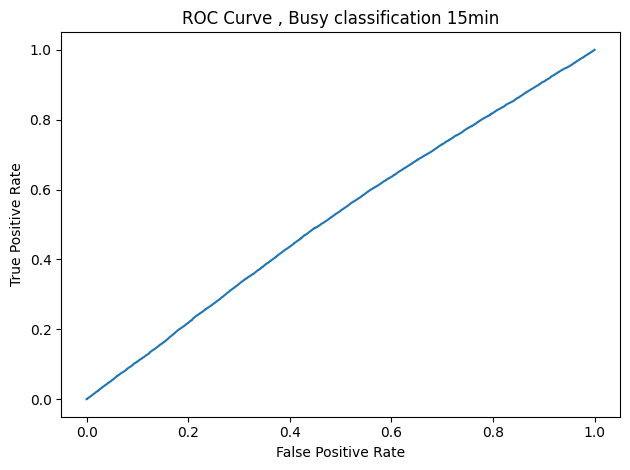

In [45]:
fpr, tpr, _ = roc_curve(y_true_cls, proba)

plt.figure()
plt.plot(fpr, tpr)
plt.title("ROC Curve , Busy classification 15min")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.tight_layout()
plt.show()


Precision high means when you say busy, you are usually right.

Recall high means you catch most busy cases.

ROC AUC closer to 1.0 is better than 0.5.

This is the cleanest way to output probabilities in your API if you define what “busy” means.



### Insight:
We reframed the task as a binary classification problem to predict whether a street would be highly occupied (≥ 80%) in 15 minutes. The classifier performed close to random, indicating that snapshot-based street-level features do not contain enough signal to reliably predict extreme congestion states. This suggests that the data is better suited for probabilistic or continuous occupancy estimation rather than hard busy/not-busy classification.

---

8) Worst-case streets investigation (stress test)

This identifies segments where the model fails the most.

In [46]:
df_err = test_with_sizes.copy()
df_err["pred"] = models_by_horizon["15min"].predict(df_err[best_features])
df_err["abs_err"] = np.abs(df_err["occupancy_15min_future"] - df_err["pred"])

seg_err = (
    df_err
    .groupby("RoadSegmentID")
    .agg(
        num_points=("abs_err", "size"),
        mae=("abs_err", "mean"),
        p90=("abs_err", lambda x: np.percentile(x, 90)),
        bays=("num_bays", "first")
    )
    .reset_index()
    .sort_values("mae", ascending=False)
)

print("Worst 10 segments by MAE")
seg_err.head(10)


Worst 10 segments by MAE


,RoadSegmentID,num_points,mae,p90,bays
128,23246.0,43,0.492170,0.572493,7
114,22452.0,57,0.489703,0.572793,7
96,21123.0,49,0.488998,0.560858,5
132,23343.0,45,0.487160,0.581515,5
94,21117.0,160,0.486385,0.580262,6
121,22915.0,86,0.485248,0.573389,5
109,22201.0,90,0.483312,0.572789,5
124,23151.0,25,0.482268,0.582952,14
67,20190.0,165,0.476328,0.572326,6
123,23062.0,135,0.474820,0.570482,5


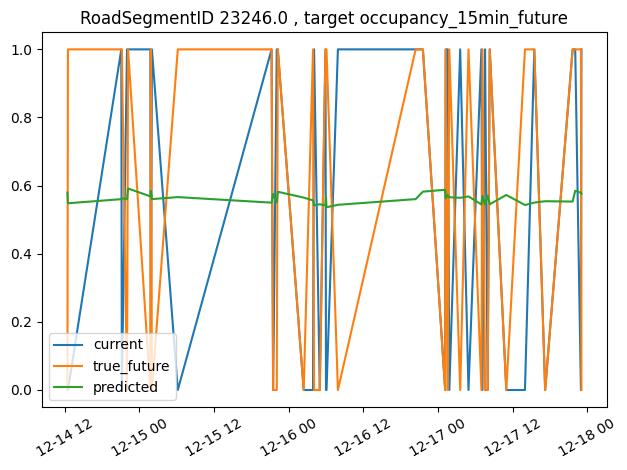

In [47]:
worst_seg = seg_err.iloc[0]["RoadSegmentID"]
plot_stability_for_segments(models_by_horizon["15min"], best_features, "occupancy_15min_future", [worst_seg])


If worst streets have very few data points or few bays, that is expected.

If worst streets are large and still bad, your segment boundaries might be too heterogeneous, later you consider zoning or splitting.

### Insight:
Further experiments showed that reframing the problem as a binary busy/not-busy classification task yielded near-random performance, indicating insufficient signal to predict extreme congestion states. Worst-case error analysis revealed that failures are concentrated in small streets with highly volatile occupancy, where abrupt regime changes dominate. These results suggest that snapshot-based data is better suited for estimating expected demand rather than detecting sharp transitions or extreme occupancy levels.